# Most Streamed Spotify Songs 2023

This dataset, which I found on Kaggle (https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023) contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

## Goal:

<ul>
    <li>1) Which artist’s songs had the overall most streams (Top 20)?
    <li>2) Does the number of featured artists in a song relate to its success on streaming numbers?
    <li>3) Is there a correlation between the number of charts/playlists a song is added to and its streams?
</ul>

### Importing all the modules that will be required in this project

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the file

In [2]:
dataset= pd.read_csv('C:/Users/karan/OneDrive/Desktop/Spotify.csv', encoding = 'latin-1')

### Analyzing the Data

In [3]:
dataset.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
dataset.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


In [5]:
dataset.shape

(953, 24)

In [6]:
dataset.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

*Through analyzing the data, I see these is an issue with the column 'Streams'. In the describe function, it doesn't show a value and in the info function, it shows as an object. It should be integer. It is the most important column of our dataset. Therefore, we need to fix it.*

### Data Cleaning

In [8]:
#This code checks whether all the values in 'streams' are numeric, if not, they are set to NAN
dataset['streams'] = pd.to_numeric(dataset['streams'], errors='coerce')

*Now we can see that the column dataset has been changed to the correct dtype*

In [14]:
dataset['streams'].dtypes

dtype('float64')

*The column 'artist(s)_name' has all the artists' name in one column, in order to answer question 2 of our goals, we need to seperate them*

In [18]:
#I used the explode function to seperate the artist into each row. 
dataset = dataset.explode('artist(s)_name')

In [19]:
dataset

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
0,Seven (feat. Latto) (Explicit Ver.),Jung Kook,2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,A Veces (feat. Feid),Paulo Londra,2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,Feid,3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5
951,En La De Ella,Sech,3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5
951,En La De Ella,Jhayco,3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


*Now for tackling the first question, 1) Which artist’s songs had the overall most streams? I am creating a WordCloud to get a good visualization of the results.*

In [21]:
#I used the join function to bring all the artists into a single string 
all_artists = ' '.join(artist for artist in dataset['artist(s)_name'])

In [25]:
all_artists

"Latto  Jung Kook Myke Towers Olivia Rodrigo Taylor Swift Bad Bunny Dave  Central Cee Eslabon Armado  Peso Pluma Quevedo Gunna Peso Pluma  Yng Lvcas Bad Bunny  Grupo Frontera NewJeans Miley Cyrus David Kushner Harry Styles SZA Fifty Fifty Billie Eilish Feid  Young Miko Jimin Gabito Ballesteros  Junior H  Peso Pluma Taylor Swift Arctic Monkeys Bizarrap  Peso Pluma The Weeknd  Madonna  Playboi Carti Fuerza Regida Rï¿½ï¿½ma  Selena G Tainy  Bad Bunny Morgan Wallen Dua Lipa Troye Sivan Peso Pluma  Grupo Frontera The Weeknd  21 Savage  Metro Boomin Taylor Swift Karol G  Shakira Big One  Duki  Lit Killah  Maria Becerra  FMK  Rusherking  Emilia  Tiago pzk Yahritza Y Su Esencia  Grupo Frontera Taylor Swift Taylor Swift Fuerza Regida Junior H  Peso Pluma Post Malone  Swae Lee Bebe Rexha  David Guetta Tyler  The Creator  Kali Uchis Nicki Minaj  Aqua  Ice Spice Miley Cyrus OneRepublic The Weeknd The Weeknd  Daft Punk Ariana Grande  The Weeknd Feid  Myke Towers  Sky Rompiendo David Guetta  Anne-Ma

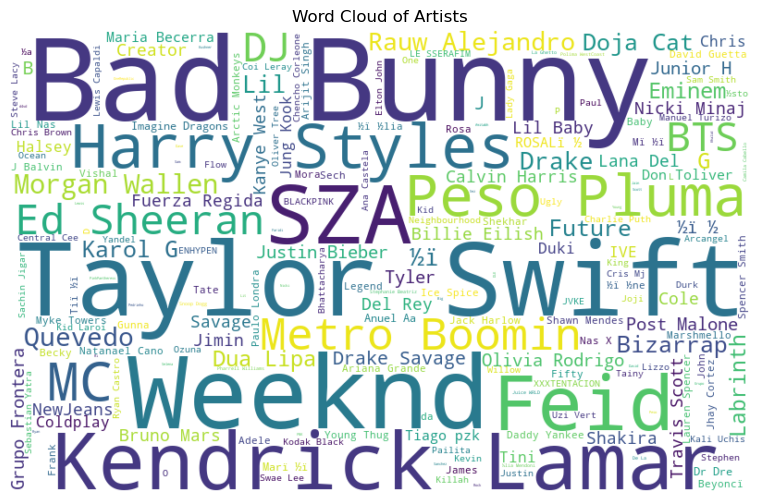

In [23]:
wordcloud = WordCloud(width=800, height=500, background_color='White').generate(all_artists)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Artists')
plt.show()

*This Word Cloud gives a great visualization of which artists are the top artist. However, I want to see a more detailed visualization. I will go ahead and create a bar graph to see a more in-depth analysis*

In [44]:
#I want to see the top 20 artists with the most combined total streams of their songs 
artist_streams = dataset.groupby('artist(s)_name')['streams'].sum().reset_index()
top_artists_streams = artist_streams.sort_values(by='streams', ascending=False).head(20)
print(top_artists_streams)

      artist(s)_name       streams
635       The Weeknd  2.392976e+10
62         Bad Bunny  2.381353e+10
188       Ed Sheeran  1.531659e+10
613     Taylor Swift  1.463038e+10
250     Harry Styles  1.160865e+10
200           Eminem  1.019373e+10
185         Dua Lipa  9.980020e+09
305    Justin Bieber  8.243081e+09
184            Drake  8.043031e+09
98               Bts  7.780428e+09
257  Imagine Dragons  7.719447e+09
177         Doja Cat  7.712952e+09
478   Olivia Rodrigo  7.442149e+09
97        Bruno Mars  7.346352e+09
135         Coldplay  7.091223e+09
509      Post Malone  6.548594e+09
606              Sza  6.493011e+09
47    Arctic Monkeys  5.569807e+09
520   Rauw Alejandro  5.566284e+09
325   Kendrick Lamar  5.555904e+09


*The total streams per artist is in quite a convoluted format. The total streams are incredibly high, therefore, I want to change them into a format which is easily readable.*

In [46]:
pd.options.display.float_format = '{:.2f}'.format

In [48]:
top_artists_streams

,artist(s)_name,streams
635,The Weeknd,23929760757.00
62,Bad Bunny,23813527270.00
188,Ed Sheeran,15316587718.00
613,Taylor Swift,14630378183.00
250,Harry Styles,11608645649.00
200,Eminem,10193727260.00
185,Dua Lipa,9980020481.00
305,Justin Bieber,8243081039.00
184,Drake,8043031261.00
98,Bts,7780428159.00


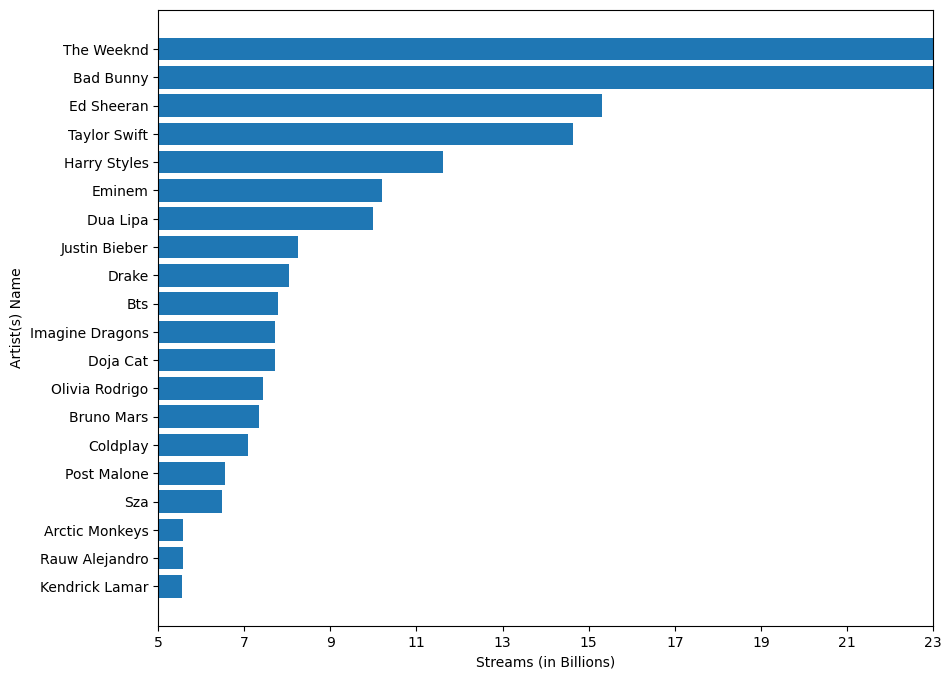

In [66]:
plt.figure(figsize=(10, 8))
bars = plt.barh(top_artists_streams['artist(s)_name'], top_artists_streams['streams'])

# Set x-axis limit from 5 to 23 billion
plt.xlim(5e9, 23e9)

# Set x-axis label
plt.xlabel('Streams (in Billions)')

# Set y-axis label
plt.ylabel('Artist(s) Name')

# Define custom ticks and labels for the x-axis
x_ticks = [5e9, 7e9, 9e9, 11e9, 13e9, 15e9, 17e9, 19e9, 21e9, 23e9]
x_labels = ['5', '7', '9', '11', '13', '15', '17', '19', '21', '23']
plt.xticks(x_ticks, x_labels)
plt.gca().invert_yaxis()
# Show the plot
plt.show()

*This bar graph gives a good representation on the top 20 artists with the most combined streams. However, I want to have a more comprehensive and appealing graph.*

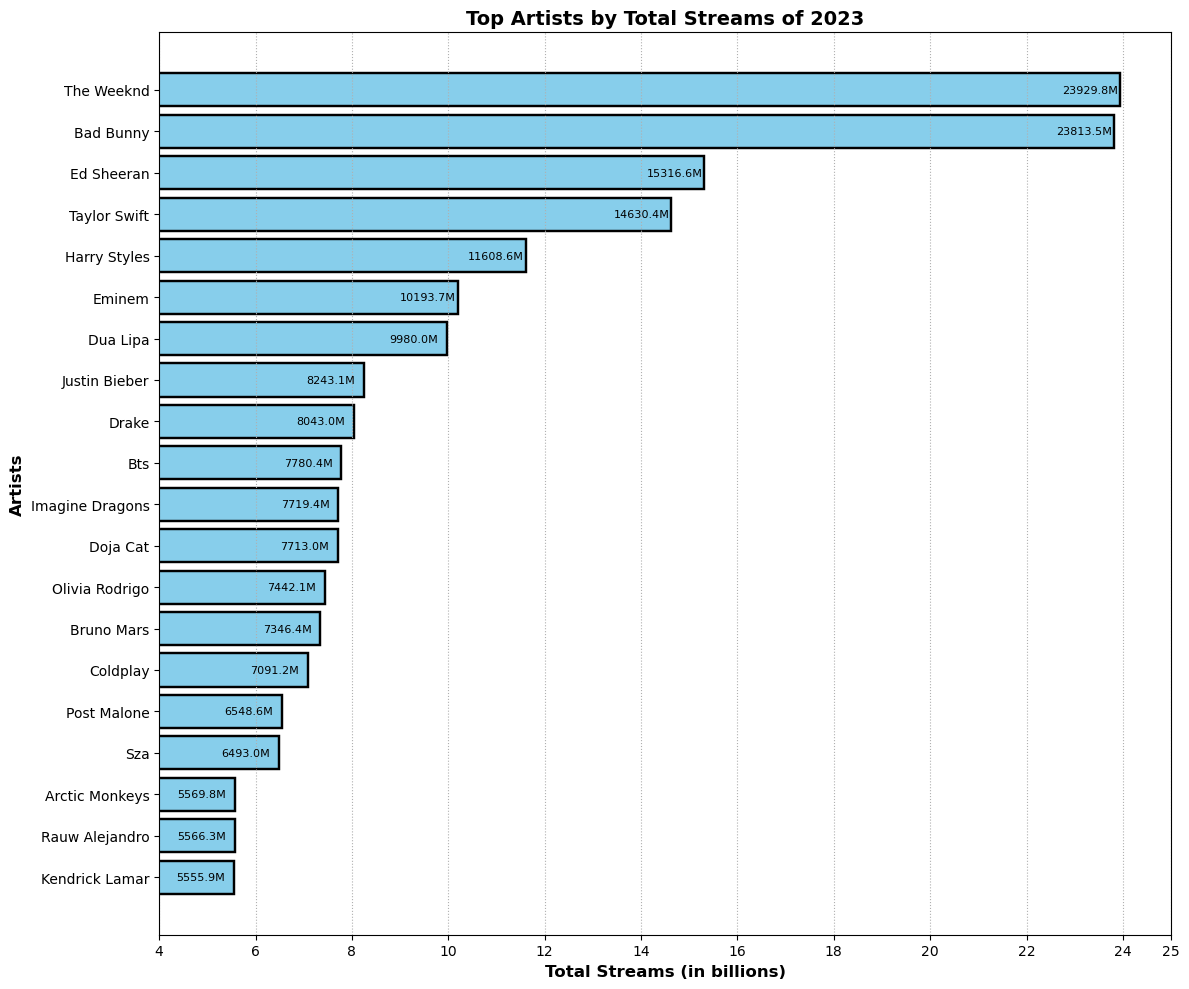

In [75]:
plt.figure(figsize=(12, 10))  # Adjust figure size for better spacing
bars = plt.barh(top_artists_streams['artist(s)_name'], top_artists_streams['streams'], color='skyblue', edgecolor='black', linewidth=1.75)

# Set x-axis limit from 4 to 25 billion
plt.xlim(4e9, 25e9)

# Define custom ticks and labels for the x-axis
x_ticks = [4e9, 6e9, 8e9, 10e9, 12e9, 14e9, 16e9, 18e9, 20e9, 22e9, 24e9, 25e9]
x_labels = ['4', '6', '8', '10', '12', '14', '16', '18', '20', '22', '24', '25']
plt.xticks(x_ticks, x_labels)

# Add annotations with adjusted x-coordinate for positioning towards the right
for bar in bars:
    plt.text(
        bar.get_width() - 0.05 * max(top_artists_streams['streams']),  # Adjusted position
        bar.get_y() + bar.get_height() / 2,  
        f'{bar.get_width()/1e6:.1f}M',
        ha='left', va='center', fontsize=8, color='black'  # Adjusted font size
    )

# Styling
plt.xlabel('Total Streams (in billions)', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Artists', fontsize=12, fontweight='bold', color='black')
plt.title('Top Artists by Total Streams of 2023', fontsize=14, fontweight='bold', color='black')
plt.grid(axis='x', linestyle=':', alpha=1)  # Add grid lines

# Show plot
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

*Now, moving onto question 2: Does the number of featured artists in a song relate to its success on streaming numbers? I will visualize this on a scatter plot.*

In [80]:
# Aggregate streaming metrics by the number of featured artists
grouped_data = dataset.groupby('artist_count')['streams'].sum().reset_index()
grouped_data

,artist_count,streams
0,1,332972034055.00
1,2,234940239182.00
2,3,97242235068.00
3,4,18366374788.00
4,5,3620205010.00
5,6,1574396154.00
6,7,4501440778.00
7,8,2771538776.00


*As we can see from the results of the variable grouped_data, the less number of artists in a song, the higher streams it has. Let us visualize this to get a better look*

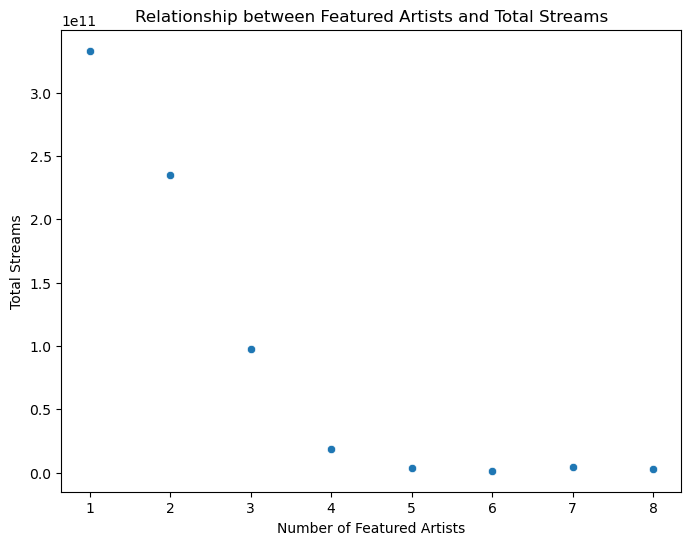

In [81]:
# Aggregate streaming metrics by the number of featured artists


# Create a scatter plot or box plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='artist_count', y='streams', data=grouped_data)
plt.xlabel('Number of Featured Artists')
plt.ylabel('Total Streams')
plt.title('Relationship between Featured Artists and Total Streams')
plt.show()


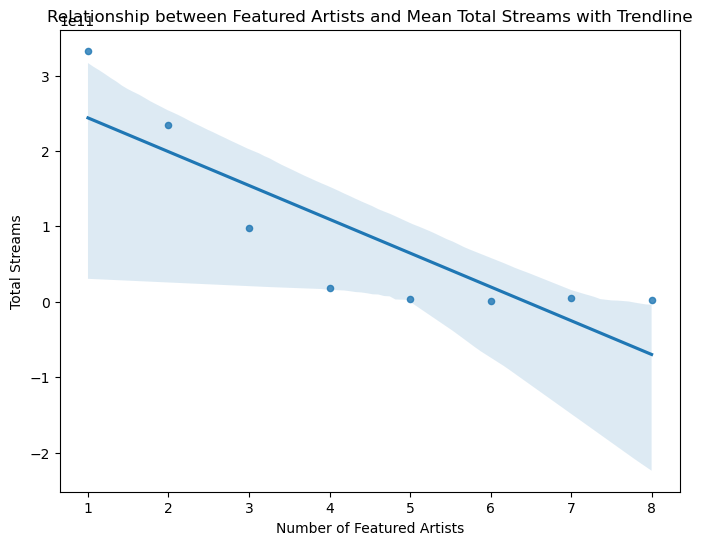

In [82]:
#I want to add a trendline to the graph to get a better understanding of the visual.

# Aggregate streaming metrics by the number of featured artists
grouped_data = dataset.groupby('artist_count')['streams'].sum().reset_index()

# Create a scatter plot with a trendline
plt.figure(figsize=(8, 6))
sns.regplot(x='artist_count', y='streams', data=grouped_data, scatter_kws={'s': 20})  # 's' adjusts the size of the markers
plt.xlabel('Number of Featured Artists')
plt.ylabel('Total Streams')
plt.title('Relationship between Featured Artists and Mean Total Streams with Trendline')
plt.show()

*This graph does indeed confirm my conclusion from before that the less the number of artists in a song, the higher it's total streams. I would also like to visualize this in a pie chart*

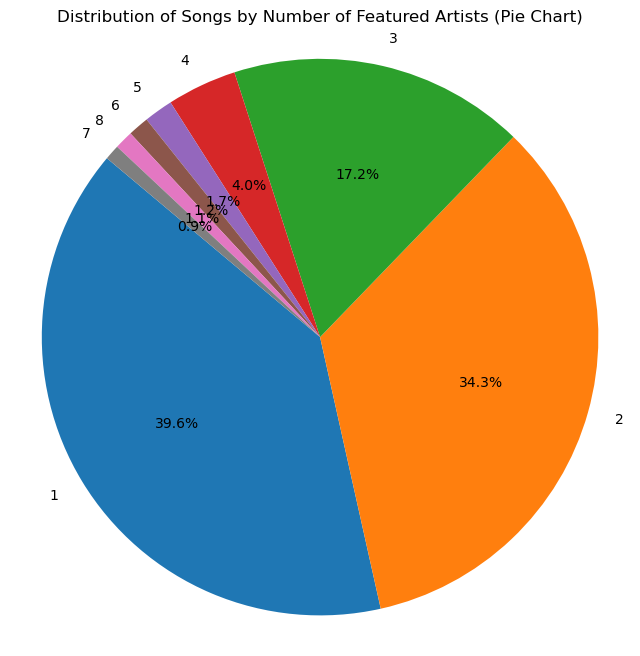

In [84]:
# Calculate the count of songs for each count of featured artists
song_count_by_artist_count = dataset['artist_count'].value_counts().reset_index()
song_count_by_artist_count.columns = ['num_featured_artists', 'song_count']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(song_count_by_artist_count['song_count'], labels=song_count_by_artist_count['num_featured_artists'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Songs by Number of Featured Artists (Pie Chart)')
plt.show()

<ul>This pie graph shows us that:
 <li>39.6% of songs in the dataset have 1 artist
 <li>34.3% of songs in the dataset have 2 artists
 <li>17.2% of songs in the dataset have 3 artists, and,
 <li>4% of songs in the dataset have 4 artists
</ul>

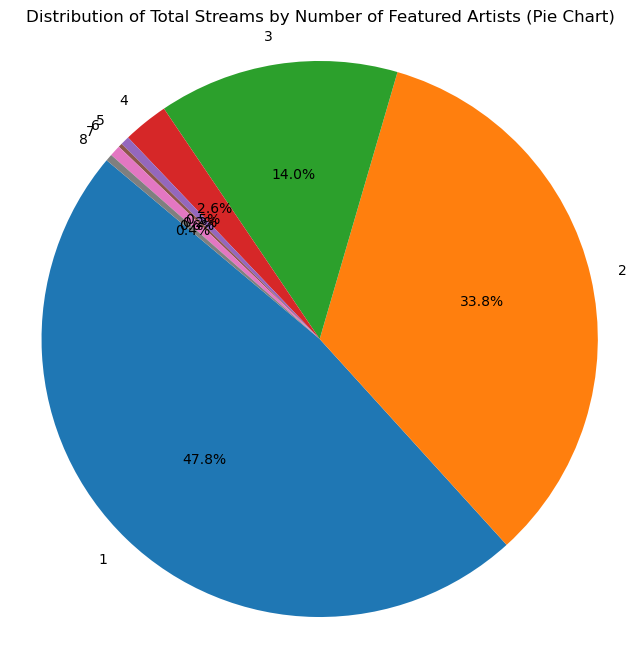

In [85]:
dataset['num_featured_artists'] = dataset['artist_count']

# Aggregate total streams by the number of featured artists
streams_by_artist_count = dataset.groupby('num_featured_artists')['streams'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(streams_by_artist_count['streams'], labels=streams_by_artist_count['num_featured_artists'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Total Streams by Number of Featured Artists (Pie Chart)')
plt.show()

This pie chart shows us that:
<li>total streams of songs with 1 artist is 47.8% of the entire dataset,
The total streams of songs with 2 artists is 33.8% of the entire dataset,
The total streams of songs with 3 artists is 14% of the entire dataset.

*Now, let's have a look at the correalation between playlists and charts with the number of streams an artist gets.*

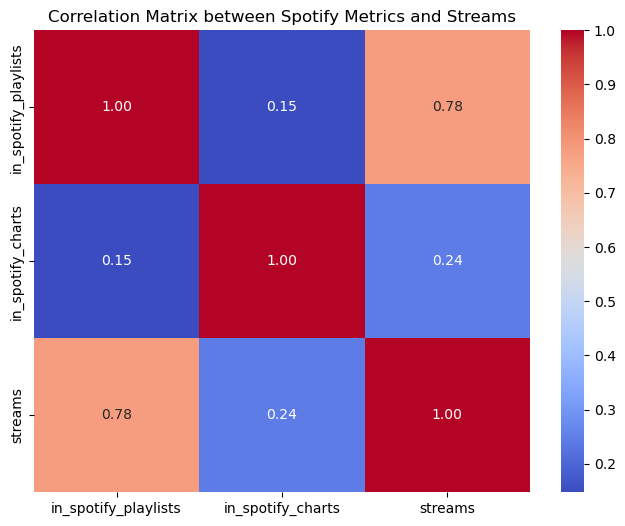

In [86]:
#Checking relationship between spotify playlists and spotify charts first. 
columns_of_interest = ['in_spotify_playlists', 'in_spotify_charts', 'streams']

# Check for and handle missing values or outliers if present in the selected columns

# Compute correlation matrix
correlation_matrix = dataset[columns_of_interest].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix between Spotify Metrics and Streams')
plt.show()

*The heatmap results shows us that there is a high correlation between in_spotify_playlists and the number of streams a song gets*

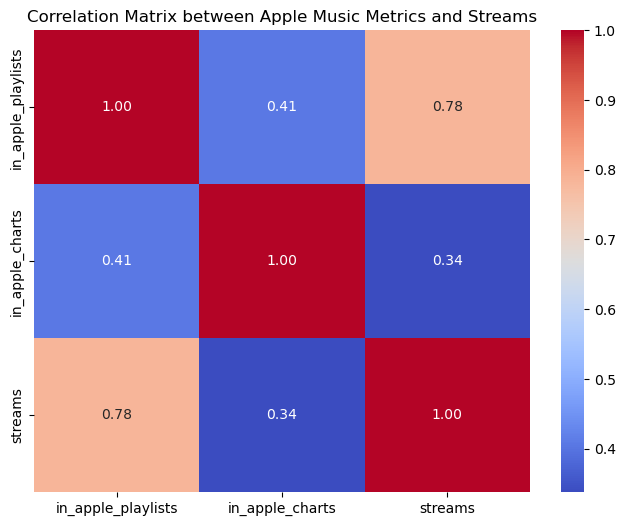

In [87]:
#Checking now for Apple Playlists and Apple Charts 
columns_of_interest1 = ['in_apple_playlists','in_apple_charts', 'streams']
correlation_matrix1= dataset[columns_of_interest1].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix between Apple Music Metrics and Streams')
plt.show()

*Again, The heatmap results shows us that there is a high correlation between in_apple_playlists and the number of streams a song receives*

### CONCLUSION

#### 1) Which artist’s songs had the overall most streams (Top 10)?:
The Weeknd,Bad Bunny,Ed Sheeran,Taylor Swift,Harry Styles,Eminem,Dua Lipa,Justin Bieber,Drake,Bts

#### 2) Does the number of featured artists in a song relate to its success on streaming numbers?:
Statistically, no. Generaly, the number of artists in a song was inversely proportional to the streams it got. 

#### 3) Is there a correlation between the number of charts/playlists a song is added to and its streams?:
Yes. The correlation found between songs being added to playlists and them having more streams is quite strong. 